# Q1 (forestfires)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import keras

In [2]:
sd=pd.read_csv("forestfires.csv")
sd

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
sd.shape

(517, 31)

In [5]:
sd.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
sd[sd.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
# as dummy variables are already given for month and day in data set, lets drop month and day
sd=sd.drop(["month","day"],axis=1)
sd.head()
X=sd.drop("size_category",axis=1)

In [8]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y= pd.DataFrame({"size_category":sd.iloc[:,-1]})
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [10]:
# lets check for proportion of values for small and large catagory
y.value_counts()/len(y)

size_category
small            0.731141
large            0.268859
dtype: float64

**it can be seen that small catagory is almost 73 % and large is 26 %,
so handling this imbalance by resampling**

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [12]:
x_resampled,y_resampled=RandomOverSampler().fit_resample(X,y)

In [13]:
print(x_resampled.shape)

(756, 28)


In [14]:
print(y_resampled.shape)

(756, 1)


In [15]:
y_resampled["size_category"]=y_resampled["size_category"].map({"small":0,"large":1})

In [16]:
# Using Test train slpit and pplying Standard scalar on the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [18]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [19]:
#Initialising ANN
classifier=Sequential()

# Adding the input layer and first hidden layer 
classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu", input_dim=28 ))
classifier.add(Dropout(0.2))

# Adding second hidden layer
classifier.add(Dense(units=15, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer= "glorot_uniform", activation= "sigmoid"))


# Compling the ANN
classifier.compile(optimizer= "adam", loss="binary_crossentropy", metrics= ["accuracy"])

In [20]:
# Fitting the ANN on training data set
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=100)

Epoch 1/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7983 - accuracy: 0.4568 - val_loss: 0.7447 - val_accuracy: 0.4340
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.7537 - accuracy: 0.5081 - val_loss: 0.7312 - val_accuracy: 0.4340
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.7436 - accuracy: 0.5081 - val_loss: 0.7187 - val_accuracy: 0.4403
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.7533 - accuracy: 0.5108 - val_loss: 0.7145 - val_accuracy: 0.4277
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.7562 - accuracy: 0.5054 - val_loss: 0.7071 - val_accuracy: 0.4591
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.5405 - val_loss: 0.7019 - val_accuracy: 0.4528
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.7330 - accuracy: 0.5351 - val_loss: 0.6985 - val_accuracy: 0.4528
Epoch 8/100
3

Epoch 59/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.7270 - val_loss: 0.5433 - val_accuracy: 0.7421
Epoch 60/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.7189 - val_loss: 0.5385 - val_accuracy: 0.7484
Epoch 61/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.7189 - val_loss: 0.5324 - val_accuracy: 0.7484
Epoch 62/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7216 - val_loss: 0.5322 - val_accuracy: 0.7296
Epoch 63/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7027 - val_loss: 0.5308 - val_accuracy: 0.7421
Epoch 64/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.6919 - val_loss: 0.5315 - val_accuracy: 0.7233
Epoch 65/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.7297 - val_loss: 0.5179 - val_accuracy: 0.7736
Epoch 

In [21]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


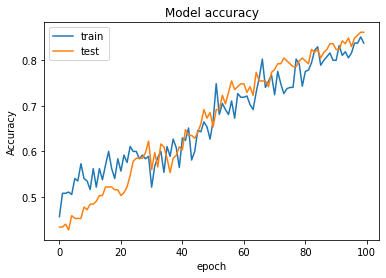

In [22]:
# summary of History for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"],loc="upper left")
plt.show()

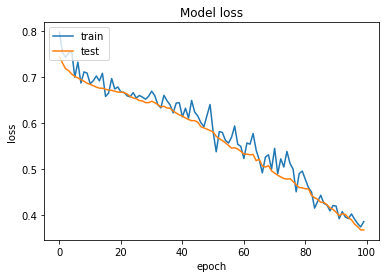

In [23]:
# summary of History for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"],loc="upper left")
plt.show()

In [24]:
# Predicting the test 
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
confusion_matrix(y_test,y_pred)

array([[111,  10],
       [ 23,  83]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.8546255506607929

**Optimizing the parameters using keras tuner**

In [28]:
from keras_tuner import RandomSearch
from tensorflow.keras import layers

In [29]:
def build_model(hp):
    model=keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [30]:
tuner=RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [31]:
tuner.search(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 13s]
val_accuracy: 0.9162995517253876

Best val_accuracy So Far: 0.9471365809440613
Total elapsed time: 00h 00m 38s
INFO:tensorflow:Oracle triggered exit


In [32]:
classifier1=Sequential()
classifier1.add(Dense(160,input_dim=28, activation='relu'))
classifier1.add(Dense(32,activation='relu'))
classifier1.add(Dense(1,activation='sigmoid'))

In [33]:
# Compling the ANN
optimizer=keras.optimizers.Adam(learning_rate=0.001)
classifier1.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

In [34]:
modela_history1=classifier1.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=150)

Epoch 1/150
37/37 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.4649 - val_loss: 0.6819 - val_accuracy: 0.5409
Epoch 2/150
37/37 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.6757 - val_loss: 0.6386 - val_accuracy: 0.6226
Epoch 3/150
37/37 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.7459 - val_loss: 0.6187 - val_accuracy: 0.6289
Epoch 4/150
37/37 [==============================] - 0s 1ms/step - loss: 0.5389 - accuracy: 0.7892 - val_loss: 0.5878 - val_accuracy: 0.6604
Epoch 5/150
37/37 [==============================] - 0s 1ms/step - loss: 0.4938 - accuracy: 0.8459 - val_loss: 0.5612 - val_accuracy: 0.6981
Epoch 6/150
37/37 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8459 - val_loss: 0.5315 - val_accuracy: 0.7421
Epoch 7/150
37/37 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8811 - val_loss: 0.5136 - val_accuracy: 0.7610
Epoch 8/150
3

Epoch 59/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9946 - val_loss: 0.3020 - val_accuracy: 0.9371
Epoch 60/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.3259 - val_accuracy: 0.9119
Epoch 61/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 0.9865 - val_loss: 0.3314 - val_accuracy: 0.9182
Epoch 62/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9838 - val_loss: 0.3446 - val_accuracy: 0.8868
Epoch 63/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.2967 - val_accuracy: 0.9119
Epoch 64/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9838 - val_loss: 0.3294 - val_accuracy: 0.9182
Epoch 65/150
37/37 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9919 - val_loss: 0.3210 - val_accuracy: 0.9119
Epoch 

In [35]:
# Predicting the test 
y_pred1=classifier1.predict(X_test)
y_pred1=(y_pred1>=0.5)

In [36]:
accuracy_score(y_test,y_pred1)

0.9162995594713657

In [37]:
y_pred2=classifier1.predict(X_train)
y_pred2=(y_pred2 >= 0.5)

In [38]:
accuracy_score(y_train,y_pred2)

0.9773156899810964

# Q2 (Gas_turbines)

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [283]:
gt=pd.read_csv("gas_turbines.csv")
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [284]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [285]:
gt.shape

(15039, 11)

In [286]:
gt[gt.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [287]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [288]:
gt.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

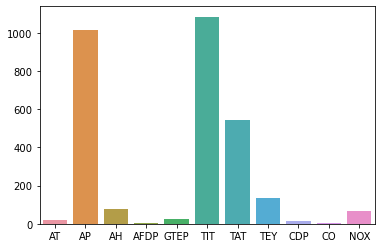

In [289]:
sns.barplot(data=gt)

**here according to question the target variable is TEY i.e(Turbine Energy Yeild)**

In [290]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [291]:
scaler=StandardScaler()
standardized_gt=scaler.fit_transform(gt)
df=pd.DataFrame(standardized_gt,columns=gt.columns)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [292]:
X=df.drop(["TEY"],axis=1)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [293]:
y=df['TEY']
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [294]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [295]:
# from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

In [296]:
n_features=X.shape[1]
n_features

10

In [297]:
# cteate model
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=n_features,kernel_initializer='unifrom',activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    # here we take loss func as means_squared_error coz its regression classifier
    optmizer=RMSprop(0.03)# Learning_rate is 0.03
    model.compile(loss='mean_squared_error',optimizer=optmizer,metrics=['accuracy'])
    return model

In [298]:
import tensorflow as tf
from tensorflow import keras

In [299]:
# Create the model
model=KerasClassifier(build_fn=create_model,verbose = 0)
# Define the grid search parameters
batch_size=[10,20,40]
epochs=[10,50,100]
# Make a dictionary of the grid search parameters
param_grid=dict(batch_size=batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,y)

<ipython-input-299-435ad295a585>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    Return parameters that has been used for the estimator.
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-297-13e88dff

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    Return parameters that has been used for the estimator.
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-297-13e88dff2ef3>", line 4, in create_model
    model.add(Dense(12,input_dim=n_features,kernel_initializer='unifrom',activation='relu'))
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 120, 

[CV 2/5; 5/9] END ..................batch_size=20, epochs=50; total time=   0.0s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................
[CV 3/5; 5/9] END ..................batch_size=20, epochs=50; total time=   0.0s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................
[CV 4/5; 5/9] END ..................batch_size=20, epochs=50; total time=   0.0s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................
[CV 5/5; 5/9] END ..................batch_size=20, epochs=50; total time=   0.0s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................
[CV 1/5; 6/9] END .................batch_size=20, epochs=100; total time=   0.0s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................
[CV 2/5; 6/9] END .................batch_size=20, epochs=100; total time=   0.0s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................
[CV 3/5; 6/9] END ..........

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    Return parameters that has been used for the estimator.
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-297-13e88dff2ef3>", line 4, in create_model
    model.add(Dense(12,input_dim=n_features,kernel_initializer='unifrom',activation='relu'))
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 120, 

[CV 4/5; 7/9] END ..................batch_size=40, epochs=10; total time=   0.0s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................
[CV 5/5; 7/9] END ..................batch_size=40, epochs=10; total time=   0.0s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................
[CV 1/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.0s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................
[CV 2/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.0s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.0s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.0s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END ..........

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    Return parameters that has been used for the estimator.
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ipython-input-297-13e88dff2ef3>", line 4, in create_model
    model.add(Dense(12,input_dim=n_features,kernel_initializer='unifrom',activation='relu'))
  File "C:\Users\HP\anaconda3\lib\site-packages\keras\layers\core\dense.py", line 120, 

ValueError: Unknown initializer: unifrom. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
# Summarize the results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

In [300]:
# we get best learning rate as 0.001 and dropout rate as 0 and best neurons as 4 and 2, so now we can build final model

In [301]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [302]:
optmizer=RMSprop(0.001)
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim=(n_features),activation='relu'),
    keras.layers.Dense(2,activation='relu')
])
model_new.compile(optimizer=optmizer,loss='mean_squared_error',metrics=['accuracy'])

In [303]:
seed_value=42;
import random
import tensorflow
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
1053/1053 [==============================] - 3s 2ms/step - loss: 0.5495 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4747 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4737 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4736 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4735 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4734 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 2s 1ms/step - loss: 0.4733 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4733 - accuracy: 0.0000e+00
Epoch 10/10
1053/1053 [=======================

In [304]:
model_new.evaluate(X_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.0000e+00


[0.492971271276474, 0.0]